<a href="https://colab.research.google.com/github/KSreeChandana/task_7/blob/main/Random_Forest_Assignment16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

**Importing the dataset**

In [18]:
df= pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [19]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [20]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [21]:
df["Gender"]= df["Gender"].map({'Male':1,'Female': 2 })

In [22]:
df= df.drop(columns=["User ID"], axis= 1)
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,2,26,43000,0
3,2,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,2,46,41000,1
396,1,51,23000,1
397,2,50,20000,1
398,1,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [23]:
from sklearn.model_selection import train_test_split
X= df.drop(columns= "Purchased", axis= 1)
Y = df['Purchased'].values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state= 10)


**Feature Scaling**

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

**Fitting Random Forest to the Training set**

In [25]:
rf = RandomForestClassifier(n_estimators= 100, max_depth = 6, max_features='sqrt')
rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=6, max_features='sqrt')

**Predicting the Test set results**

In [26]:
predictions = rf.predict(X_test)
predictions

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0])

In [27]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
acc= accuracy_score(Y_test, predictions)
print(acc)

0.925


In [28]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, f1_score
f1_score= f1_score(Y_test, predictions)
f1_score

0.8888888888888891

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


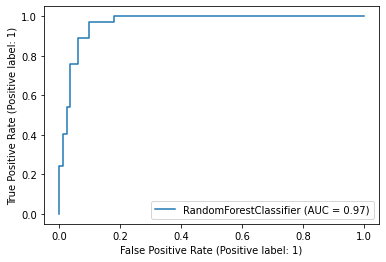

In [29]:
plot_roc_curve(rf, X_test, Y_test)

**Making the Confusion Matrix**

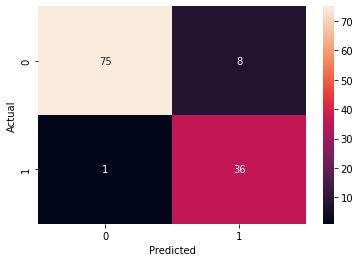

In [30]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve, confusion_matrix
cm= pd.crosstab(Y_test, predictions, rownames= ["Actual"], colnames= ["Predicted"])
sns.heatmap(cm, annot= True)
plt.show()

**Visualising the Training set results**

In [31]:
train_accuracy = accuracy_score(Y_train,rf.predict(X_train))
print(train_accuracy)

0.9607142857142857


**Visualising the Test set results**

In [32]:
y_pred = rf.predict(X_test)
test_acc= accuracy_score(Y_test, y_pred)
print( "test accuracy: {:2f}".format(test_acc))

test accuracy: 0.925000
